# Homework 4

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, October 6th, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

**Michelle (Chia Chi) Ho, Jiejun Lu, Jiawen Tong**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

from scipy.stats import norm

## Question 1: Rubber Chickens Bawk Bawk!

In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018fall/homeworks/lotus1.png) |  ![alt](https://am207.github.io/2018fall/homeworks/toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018fall/homeworks/lotus2.png) |  ![alt](https://am207.github.io/2018fall/homeworks/toysmith2.png)

(The images above are also included on canvas in case you are offline, see below)

In the following, we will ask you to compare these two products using the various rating statistics. **Larger versions of the images are available in the data set accompanying this notebook**.

Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars.


1.1. Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

1.2. Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$. 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.
  

1.3. Sample 1,000 values of $\theta$ from the *posterior distribution*.
 
1.4. Sample 1,000 values of $x$ from the *posterior predictive distribution*.

1.5. Name at least two major potential problems with using only the average customer ratings to compare products.

  (**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)
  

1.6. Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

1.7. Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

1.8. Finally, which rubber chicken product is superior?

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)

---
### Answer 1.1

$\alpha_i$: psuedo-counts of seen $\theta_i$, should be all >1, or the Dirichlet distribution is sparse. 

Since most reviews are 1 or 5 stars, an appropriate choice of $\alpha$ can be $[1000, 1, 1, 1, 1000]$.

---
### Answer 1.2

**Prior**: for $\sum_{i=1}^k \theta_i = 1$,
$$p(\theta) = \text{Dirichlet}(\theta; \alpha) = \frac{1}{B(\alpha)}\prod_{i=1}^k \theta_i^{\alpha_i - 1}
$$
**Data Likelihood**: Let $X = \{x_1, \ldots, x_n\}$, for $\sum_{i=1}^k x_i = n$,
$$p(X|\theta) = \frac{n!}{x_1! \ldots x_n!} \prod_{i=1}^k \theta_i^{x_i}
$$
**Posterior**:
$$p(\theta | X) \propto p(\theta) p(X|\theta)
= \frac{1}{B(\alpha)} \frac{n!}{x_1! \ldots x_n!} \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}
\propto \text{Dirichlet}(\theta; \alpha + X)
$$
where
$$\alpha + X = [\alpha_1 + x_1, \ldots, \alpha_n + x_n]
$$

---
### Answer - Code 1.3, 1.4

In [2]:
np.random.seed(1)

# prior and data
alpha = np.array([1000, 1, 1, 1, 1000])
X1 = np.array([109, 27, 10, 6, 10])
X2 = np.array([246, 45, 29, 33, 57])

# 1.3 sample 1000x from theta's posterior
theta_post_1 = np.random.dirichlet(alpha+X1, 1000)
theta_post_2 = np.random.dirichlet(alpha+X2, 1000)

# 1.4 sample 1000x from posterior predictive
X_pp_1 = np.array([np.random.multinomial(1, theta_post_1[i]) for i in range(1000)])
X_pp_2 = np.array([np.random.multinomial(1, theta_post_2[i]) for i in range(1000)])

---
### Answer 1.5

**2 major issues using mean rating:**

- A product with very polarized ratings (some people love it, but some people absolutely hate it) and a product with overall average ratings (most people like it enough) can have the same mean rating. The mean rating does not reflect the fact that the former is a "riskier" investment with higher variance.

- A product with a single 5 star review and a product with 1000 x 5 star review have the same mean rating, but the significance of their mean rating is very much different. The latter has a lot more evidence for good quality and popularity compared to the former. This, again, is not reflected in mean rating. 


---
### Answer - Code 1.6

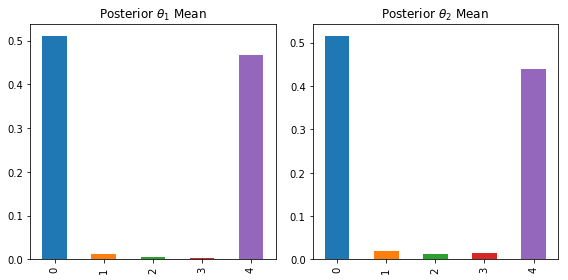

In [3]:
# 1.6
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
pd.Series(theta_post_1.mean(axis=0)).plot(kind='bar', ax=axes[0], title=r'Posterior $\theta_1$ Mean')
pd.Series(theta_post_2.mean(axis=0)).plot(kind='bar', ax=axes[1], title=r'Posterior $\theta_2$ Mean')

plt.tight_layout()

In [4]:
theta_p1_mean = theta_post_1.mean(axis=0)
theta_p1_std = theta_post_1.std(axis=0)
theta_p1_CI_left = np.percentile(theta_post_1, q=2.5, axis=0)
theta_p1_CI_right = np.percentile(theta_post_1, q=97.5, axis=0)

theta_p2_mean = theta_post_2.mean(axis=0)
theta_p2_std = theta_post_2.std(axis=0)
theta_p2_CI_left = np.percentile(theta_post_2, q=2.5, axis=0)
theta_p2_CI_right = np.percentile(theta_post_2, q=97.5, axis=0)

print('Posterior Distribution Statistics\n')

print('--- Lotus World ---')
print('Mean, Std and 95% CI of thetas:')
_ = [print('{}: mean = {}, std = {}, CI = [{}, {}]'.format(
    i+1, theta_p1_mean[i], theta_p1_std[i], theta_p1_CI_left[i], theta_p1_CI_right[i])) for i in range(5)]

print('\n--- Toysmith ---')
print('Mean, Std and 95% CI of thetas:')
_ = [print('{}: mean = {}, std = {}, CI = [{}, {}]'.format(
    i+1, theta_p2_mean[i], theta_p2_std[i], theta_p2_CI_left[i], theta_p2_CI_right[i])) for i in range(5)]

Posterior Distribution Statistics

--- Lotus World ---
Mean, Std and 95% CI of thetas:
1: mean = 0.5114852459087591, std = 0.01055304165208482, CI = [0.4898694359291991, 0.530968152703637]
2: mean = 0.013072964745182571, std = 0.0025558462494280126, CI = [0.008474026699593568, 0.018660810311769978]
3: mean = 0.005045661764525431, std = 0.001558959263147883, CI = [0.0024701410298258513, 0.00876373982860273]
4: mean = 0.0032822465679146796, std = 0.001256916750209191, CI = [0.001349292854159108, 0.006317892509570851]
5: mean = 0.46711388101361795, std = 0.01052788449724963, CI = [0.4476562264804793, 0.48921580243100393]

--- Toysmith ---
Mean, Std and 95% CI of thetas:
1: mean = 0.5162654401625343, std = 0.010089912595720675, CI = [0.4975175967260403, 0.5369283091253497]
2: mean = 0.01902819724353664, std = 0.0026262374621515406, CI = [0.014230618212845426, 0.024359461056295523]
3: mean = 0.012474359120238986, std = 0.0022982600475664134, CI = [0.008199954378089217, 0.017198354432148268]

### Answer 1.6
Based on statistics on the 2 posterior distributions, Lotus World has slightly smaller $\theta_1$ and larger $\theta_5$ than Toysmith. This suggests Lotus World is slightly better than Toysmith.

---

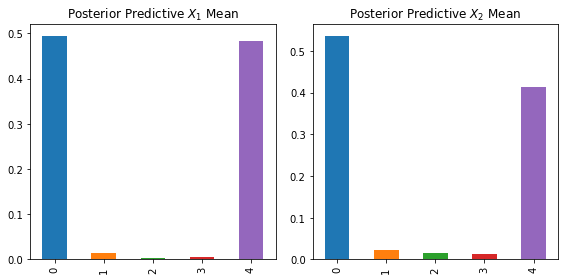

In [5]:
# 1.7
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
pd.Series(X_pp_1.mean(axis=0)).plot(kind='bar', ax=axes[0], title=r'Posterior Predictive $X_1$ Mean')
pd.Series(X_pp_2.mean(axis=0)).plot(kind='bar', ax=axes[1], title=r'Posterior Predictive $X_2$ Mean')

plt.tight_layout()

---
### Answer - Code 1.7

In [6]:
X_pp_1_mean = X_pp_1.mean(axis=0)
X_pp_1_std = X_pp_1.std(axis=0)
X_pp_1_CI_left = np.percentile(X_pp_1, q=2.5, axis=0)
X_pp_1_CI_right = np.percentile(X_pp_1, q=97.5, axis=0)

X_pp_2_mean = X_pp_2.mean(axis=0)
X_pp_2_std = X_pp_2.std(axis=0)
X_pp_2_CI_left = np.percentile(X_pp_2, q=2.5, axis=0)
X_pp_2_CI_right = np.percentile(X_pp_2, q=97.5, axis=0)

print('Posterior Predictive Distribution Statistics\n')

print('--- Lotus World ---')
print('Mean, Std and 95% CI of Xi:')
_ = [print('{}: mean = {}, std = {}, CI = [{}, {}]'.format(
    i+1, X_pp_1_mean[i], X_pp_1_std[i], X_pp_1_CI_left[i], X_pp_1_CI_right[i])) for i in range(5)]

print('\n--- Toysmith ---')
print('Mean, Std and 95% CI of Xi:')
_ = [print('{}: mean = {}, std = {}, CI = [{}, {}]'.format(
    i+1, X_pp_2_mean[i], X_pp_2_std[i], X_pp_2_CI_left[i], X_pp_2_CI_right[i])) for i in range(5)]

Posterior Predictive Distribution Statistics

--- Lotus World ---
Mean, Std and 95% CI of Xi:
1: mean = 0.495, std = 0.499974999374966, CI = [0.0, 1.0]
2: mean = 0.014, std = 0.11749042514179733, CI = [0.0, 0.0]
3: mean = 0.004, std = 0.06311893535223813, CI = [0.0, 0.0]
4: mean = 0.005, std = 0.07053367989832922, CI = [0.0, 0.0]
5: mean = 0.482, std = 0.49967589495592485, CI = [0.0, 1.0]

--- Toysmith ---
Mean, Std and 95% CI of Xi:
1: mean = 0.537, std = 0.49862912068991705, CI = [0.0, 1.0]
2: mean = 0.022, std = 0.1466833323864717, CI = [0.0, 0.0]
3: mean = 0.015, std = 0.12155245781143303, CI = [0.0, 0.0]
4: mean = 0.012, std = 0.10888526071053001, CI = [0.0, 0.0]
5: mean = 0.414, std = 0.49254847477177216, CI = [0.0, 1.0]


### Answer 1.7
Based on statistics on the 2 posterior predictive distributions, Lotus World has slightly smaller $X_1$ and larger $X_5$ than Toysmith, suggesting Lotus World being slightly better than Toysmith.


---
### Answer 1.8
The conclusions from posterior and posterior predictive are consistent: Lotus World is slightly better than Toysmith.

---

## Question 2: He Who is Not Courageous Enough to Take Risks Will Accomplish Nothing In Life

**No Coding required**

Consider a setting where the feature and label space are $\mathcal{X} = \mathcal{Y} = [0, 1]$.    In this exercise we will consider both the square loss and the absolute loss, namely:

$$ \mathbb{l}_{sq}(y_1, y_2) = (y_1 - y_2)^2 $$
$$ \mathbb{l}_{abs}(y_1, y_2) = \left \vert y_1 - y_2 \right \vert $$


Let (X, Y) be random, with the following with joint probability density $p_{XY}(x, y) = 2y$, where $x, y \ \in \  [0, 1]$.  We define **statistical risk** as follows:

**Definition (Statistical Risk)** For a prediction rule $f$ and a joint distribution of features and labels $P_{XY}$ the statistical risk $\mathcal{R}(f)$ of $f$ is defined as 

$$\mathcal{R}(f) \equiv \mathbb{E}_{XY}\left[\mathbb{l}(f(X),Y)\ \vert \ f \right]$$,

where $(X, Y) \sim P_{XY}$.  The conditional statement ensures the definition is sensible even if $f$ is a random quantity.


2.1. Show that in this case $X$ and $Y$ are independent, meaning the feature $X$ carries no information about Y.

2.2. What is the risk of prediction rule $f(x) = \frac{1}{2}$ according to the two loss functions?

2.3. What is the risk of the prediction rule $f^*(x) = \frac{1}{\sqrt{2}}$ according to the two loss functions?

2.4. Show that $f^*$ has actually the smallest absolute loss risk among all prediction rules.

**Hint (for 2.3):**

`In general the Bayes predictor according to the absolute value loss is the median of the conditional distribution of $Y$ given $X = x$.`

---
### Answer 2.1
$$p(x) = \int p(x,y) dy = \int_0^1 2y dy = y^2 \Big|_0^1 = 1$$

$$p(y) = \int p(x,y) dx = \int_0^1 2y dx = 2yx \Big|_0^1 = 2y$$

$$\Rightarrow p(x)p(y) = 1 \cdot 2y = 2y = p(x,y)$$

Therefore, $X$ and $Y$ are independent.

---
### Answer 2.2
$f(x) = \frac{1}{2}$

- According to SQUARE LOSS $\mathbb{l}_{sq}(f(x), y)$:

$$
\begin{align}
\mathbb{E}_{XY} \big[(y- \frac{1}{2})^2 \big] &= \int_{0}^{1}\int_{0}^{1}(y- \frac{1}{2})^2 \cdot 2y \thinspace \thinspace dx \thinspace dy \\
 &= \int_{0}^{1}(y- \frac{1}{2})^2 \cdot 2y \thinspace \thinspace dy \\
 &= \int_{0}^{1}(y^2 - y + \frac{1}{4}) \cdot 2y \thinspace \thinspace dy \\
 &= \int_{0}^{1}2y^3 - 2y^2 + \frac{y}{2}\thinspace \thinspace dy \\
 &= \bigg(\frac{y^4}{2} - \frac{2y^3}{3} + \frac{y^2}{4}\bigg) \Big|_0^1 \\
 & = \frac{1}{12}
\end{align}
$$ 

- According to ABSOLUTE LOSS $\mathbb{l}_{abs}(f(x), y)$:

$$
\begin{align}
\mathbb{E}_{XY} \big[ \thinspace \big|y- \frac{1}{2}\big| \thinspace \big] &= \int_{0}^{1}\int_{0}^{1} \big|y- \frac{1}{2}\big| \cdot 2y \thinspace \thinspace dx \thinspace dy \\
&= \int_{0}^{1} \big|y- \frac{1}{2}\big| \cdot 2y \thinspace \thinspace dy \\
&= \int_{0}^{\frac{1}{2}} - (y- \frac{1}{2}) \cdot 2y \thinspace \thinspace dy + \int_{\frac{1}{2}}^{1} y- \frac{1}{2} \cdot 2y \thinspace \thinspace dy  \\
&= \int_{0}^{1/2} - 2y^2 + y\thinspace \thinspace dy + \int_{1/2}^{1} 2y^2 - y \thinspace \thinspace dy  \\
&= \bigg( \frac{-2y^3}{3} + \frac{y^2}{2}\bigg) \Big|_0^{1/2} + \bigg( \frac{2y^2}{3} - \frac{y^2}{2} \bigg) \Big|_{1/2}^1 \\
&= \frac{1}{4}
\end{align}
$$

---
### Answer 2.3
$f^*(x) = \frac{1}{\sqrt{2}}$

- According to SQUARE LOSS $\mathbb{l}_{sq}(f(x), y)$:

$$
\begin{align}
\mathbb{E}_{XY} \big[(y- \frac{1}{\sqrt{2}})^2 \big] &= \int_{0}^{1}\int_{0}^{1}(y- \frac{1}{\sqrt{2}})^2 \cdot 2y \thinspace \thinspace dx \thinspace dy \\
 &= \int_{0}^{1}(y- \frac{1}{\sqrt{2}})^2 \cdot 2y \thinspace \thinspace dy \\
 &= \int_{0}^{1}(y^2 - \frac{2}{\sqrt{2}}y + \frac{1}{2}) \cdot 2y \thinspace \thinspace dy \\
 &= \int_{0}^{1}2y^3 - \frac{4}{\sqrt{2}} y^2 + y \thinspace \thinspace dy \\
 &= \bigg(\frac{y^4}{2} - \frac{4}{\sqrt{2}} \frac{y^3}{3} + \frac{y^2}{2}\bigg) \Big|_0^1 \\
 & = 1 - \frac{4}{3 \sqrt{2}} \approx 0.05719
\end{align}
$$ 

- According to ABSOLUTE LOSS $\mathbb{l}_{abs}(f(x), y)$:

$$
\begin{align}
\mathbb{E}_{XY} \big[ \thinspace \big|y- \frac{1}{\sqrt{2}}\big| \thinspace \big] &= \int_{0}^{1}\int_{0}^{1} \big|y- \frac{1}{\sqrt{2}}\big| \cdot 2y \thinspace \thinspace dx \thinspace dy \\
&= \int_{0}^{1} \big|y- \frac{1}{\sqrt{2}}\big| \cdot 2y \thinspace \thinspace dy \\
&= \int_{0}^{\frac{1}{\sqrt{2}}} - (y- \frac{1}{\sqrt{2}}) \cdot 2y \thinspace \thinspace dy + \int_{\frac{1}{\sqrt{2}}}^{1} y- \frac{1}{\sqrt{2}} \cdot 2y \thinspace \thinspace dy  \\
&= \int_{0}^{1/\sqrt{2}} - 2y^2 + \frac{2}{\sqrt{2}}y\thinspace \thinspace dy + \int_{1/\sqrt{2}}^{1} 2y^2 - \frac{2}{\sqrt{2}}y \thinspace \thinspace dy  \\
&= \bigg( \frac{-2y^3}{3} + \frac{y^2}{\sqrt{2}}\bigg) \Big|_0^{1/\sqrt{2}} + \bigg( \frac{2y^2}{3} - \frac{y^2}{\sqrt{2}} \bigg) \Big|_{1/\sqrt{2}}^1 \\
&= \frac{2}{3} - \frac{2}{3\sqrt{2}} \approx 0.19526
\end{align}
$$

---
### Answer 2.4 - method 1
To show that $f^*$ has the smallest absolute loss risk among all prediction rules, we show that the Bayes predictor according the absolute loss risk is $f^*$. From the hint, we know that the Bayes predictor here is the median of the conditional distribution of $Y$ given $X = x$. Since $Y$ is independent of $X$, the conditional distribution of $Y$ given $X = x$ is $p(y)$.

So we have the following CDF:

$$ 
\begin{align}
F(Y|X) = F(Y) &= \int_{0}^{y} 2s \thinspace ds \\
&= \frac{2s^2}{2} \Big|_0^y \\
&= y^2
\end{align}
$$

To get the median, we set the CDF equal to $\frac{1}{2}$ and solve for $y$:

$$
\begin{align}
y^2 &= \frac{1}{2}\\
y &= \frac{1}{\sqrt{2}} = f^*
\end{align}
$$

---
### Answer 2.4 - method 2
$Y \in (0, 1) \Rightarrow f(X) \in (0, 1)$,
$$
\begin{align}
\mathcal{R}(f) &= \iint \mathbb{l}_{abs}(f(x), y) dxdy \\
&=\int_0^1 dx [\int_{f(X)}^1 2y (y-f(x)) + \int_0^{f(X)} 2y(f(x)-y)] \\
&= \int_0^1 (\frac{2}{3} - f(x) + \frac{2}{3}f^3(x)) dx 
\end{align}
$$

Let $M = f(x) \in (0, 1)$, and $F(M) = \frac{2}{3} - M + \frac{2}{3} M^3$,
$$
\frac{\partial F(M)}{\partial M} = 2M^2 - 1 = 0 \Rightarrow M = \frac{1}{\sqrt{2}}
$$

Therefore, $f(x) = \frac{1}{\sqrt{2}}$ gives the minimum $\mathcal{R}(f)$ with absolute loss.

---

## Question 3: Maxwell's Demon Has a Wonderful Way of showing us What Really Matters

**Some Coding required**

3.1. Find the entropy of the exponential probability density on support (0, $\infty$) with mean $\lambda$.

3.2. Show that the exponential distribution $p^*$ is the maximum entropy distribution on support (0, $\infty$)  with specified mean $\lambda$. That is to say prove that for any continuous probability density function $p(x)$ on (0, $\infty$) with mean $\lambda$ then the entropy h(p) <= h($p^*$) with equality if and only if p is also the exponential with mean $\lambda$


We're familiar with the CLT as a way of approximating the sum of IID random variables with an appropriate Normal distribution.  Let's investigate this relationship by using the KL-Divergence.  Given n identically distributed Bernoulli variables $Y_i \sim Bern(p)$, then their sum approaches a Normal distribution.

3.3. Visualize this relationship by drawing n = 10,000 samples from a Bernoulli with p = 0.02.  These samples determine a random variable and thus a probability distribution (which in the last homework we called the empirical distribution of the data).  Visualize this probability distribution by plotting a normed histogram of the samples.  On your plot overlay the appropriately fitted Gaussian distribution.  Make sure to appropriately title and label your plot.

3.4. From visual inspection are the two distributions close to each other?

3.5. Formalize your answer to 3.3 and 3.4 by writing a program to compute the K-L divergence between the two distributions (the sum of 10000 sampled Bernoullis and the appropriate Gaussian).  What is the value of the KL divergence.

3.6. Let's visualize the convergence of the sum of bernoulli RVs to a Gaussian as fortold by the CLT by repeating the process from 3.5 for various values of n.  We'll set our selection of sample sizes to the following: [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 50000, 100000].  Setting n to each of the specified sample sizes repeat the following procedure 10 times:

* Draw n bernoulli samples using the Bernoulli parameter from 3.3 (p=0.02).
* Calculate the Kullback-Leibler divergence between the random variable defined by the sum of Bernoullis samples and the appropriately fitted gaussian. 

For each sample size you should have 10 KL divergences. Construct a log scale (in both axes) plot of the Kullback-Leibler divergence and and the 3-$\sigma$ envelope against the sample size.  What can you convergence of the distributions in question?  What does this mean for the CLT?


---
### Answer 3.1
Exponential probability density on $(0, \infty)$: $p(x) = \frac{1}{\lambda} e^{-\frac{x}{\lambda}}$,

$$
\begin{align}
H(p) = -E_p[\log(p)]
&= \frac{\log \lambda}{\lambda} \int_0^\infty e^{-\frac{x}{\lambda}} dx + \frac{1}{\lambda^2} \int_0^\infty x e^{-\frac{x}{\lambda}} dx \\
&= \log \lambda e^{-\lambda x} \Big|_\infty^0 - \frac{1}{\lambda} \int_0^\infty x d(e^{-\frac{x}{\lambda}}) \\
&= \log \lambda - \frac{1}{\lambda} (x e^{-\frac{x}{\lambda}} \Big|_0^\infty - \int_0^\infty e^{-\frac{x}{\lambda}} dx)\\
&= \log \lambda -\frac{1}{\lambda} (0 - \lambda) \\
&= \log \lambda + 1
\end{align}
$$

---
### Answer 3.2
Exponential probability density on $(0, \infty)$: $p^*(x) = \frac{1}{\lambda} e^{-\frac{x}{\lambda}}$, and we know
$H(p^*) = \log \lambda + 1$ from 3.1. 

$H(p, p*)$ be the cross entropy between the exponential density and any other continuous density $p(x)$ on $(0, \infty)$,

$$
D_{KL}(p, p^*) = E_p[\log (\frac{p}{p^*})] = H(p, p^*) - H(p) \geq 0 
\Rightarrow
H(p, p^*) \geq H(p)
$$

$$
\begin{align} H(p, p^*) = -E_p[\log(p^*)]
&= -\int_0^\infty p(x) \log(\frac{1}{\lambda} e^{-\frac{x}{\lambda}}) dx \\
&= \int_0^\infty p(x)(\log \lambda + \frac{x}{\lambda}) dx \\
&= \log \lambda \int_0^\infty p(x) dx + \frac{1}{\lambda} \int_0^\infty p(x) x dx \\
&= \log \lambda + 1 \\
&= H(p^*)
\end{align}
$$

$$\Rightarrow H(p, p^*) = H(p^*) \geq H(p)$$

Hence, the exponential distribution $p^*$ (mean = $\lambda$) is the maximum entropy distribution on support (0, $\infty$). The equality can only be reached when $D_{KL}(p, p^*) = 0$, i.e., p is also the exponential distribution with mean $= \lambda$.

---
### Answer - Code 3.3

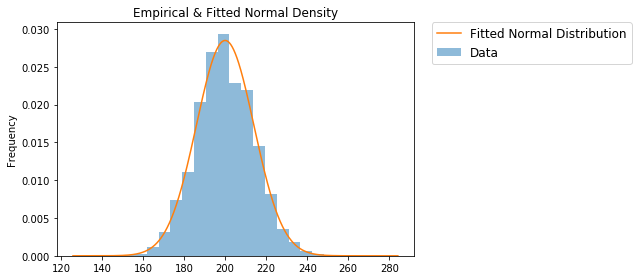

In [7]:
np.random.seed(1)

# 3.3 
bern_sum_samples = np.random.binomial(n=10000, p=0.02, size=2000000)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
pd.Series(bern_sum_samples).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=ax, 
                             label='Data')

# fit a normal distribution
mu, std = norm.fit(bern_sum_samples)
# plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
fitted_norm = norm.pdf(x, mu, std)
ax.plot(x, fitted_norm, '-', label='Fitted Normal Distribution')
ax.set_title('Empirical & Fitted Normal Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

---
### Answer 3.4
The fitted normal distribution and the empirical distribution look similar.

---

In [8]:
# 3.5
def KLD_x_norm(samples, binom_n, binom_p):
    clt_mu = binom_n * binom_p
    clt_std = np.sqrt(binom_n * binom_p * (1-binom_p))
    
    # unique value counts
    samp_counts = pd.DataFrame(samples, columns=['samp']).reset_index().groupby(['samp']).agg(len)['index']
    
    # normalize counts to frequency
    samp_freq = samp_counts/samp_counts.sum()
    
    ix = np.where(samp_freq.values > 1e-15) # indices where p(sample) != 0
    _norm = norm.pdf(samp_counts.index[ix], clt_mu, clt_std) # normal distribution
    
    kld = samp_freq.values[ix].dot(np.log(samp_freq.values[ix] / _norm))
    return kld

print('KLD(sum_bernoulli_samples, fitted_normal)', KLD_x_norm(bern_sum_samples, 10000, 0.02))

KLD(sum_bernoulli_samples, fitted_normal) 0.0004473804766626934


### Answer 3.5
The KL divergence from normal to the sum of bernoulli samples $\approx$ 0.0004

---

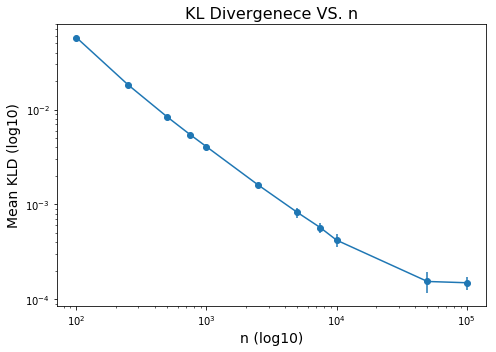

In [9]:
# 3.6
n_values = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 50000, 100000]
n_sim = 10
KLDs = np.zeros((len(n_values), n_sim))
for _i, _n_val in enumerate(n_values):
    for _j in range(n_sim):
        # draw samples
        _bern_sum_samples = np.random.binomial(n=_n_val, p=0.02, size=2000000)
        
        # compute KL divergence
        KLDs[_i, _j] = KLD_x_norm(_bern_sum_samples, _n_val, 0.02)

# plot KLD vs. n
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(x=n_values, y=KLDs.mean(axis=1), yerr=(KLDs.std(axis=1)*3), fmt='-o')
ax.set_title('KL Divergenece VS. n', fontsize=16)
ax.set_xlabel('n (log10)', fontsize=14)
ax.set_ylabel('Mean KLD (log10)', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()

### Answer - 3.6
**What can you convergence of the distributions in question?  What does this mean for the CLT?**

Consistent with the CLT, the mean KL divergences in replications decrease as `n` increases, but their standard errors increase .

---

## Q4: Marvel at the DC Flash Light Speed experiment

Simon Newcomb did an experiment in 1882 to measure the speed of light. These are the times required for light to travel 7442 metres. These are recorded as deviations from 24,800 nanoseconds.

This data is in the following dataset $D$.

In [2]:
light_speed = np.array([28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29, 22, 24, 21, 25,
                        30, 23, 29, 31, 19, 24, 20, 36, 32, 36, 28, 25, 21, 28, 29,
                        37, 25, 28, 26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27, 28,
                        27, 31, 27, 26, 33, 26, 32, 32, 24, 39, 28, 24, 25, 32, 25,
                        29, 27, 28, 29, 16, 23])

4.1. Plot a histogram of the data. Are there outliers in the data?  What data points might you consider to be outliers?

4.2. We use a normal models with weakly informative priors to model this experiment. In particular assume uniform priors for both $\mu$ and $\sigma$:

$$\mu \sim Uniform(0, 60)$$

$$\sigma \sim Uniform(0.1, 50)$$

Write down an expression for the posterior (joint) pdf $p(\mu, \sigma \vert D)$.

4.3. Set up a 500 point grid in both the $\mu$ space and the $\sigma$ space. Compute the normalized posterior on this grid and make a contour plot of it. 

**Hint: `np.meshgrid` is your friend**

4.4. Use this normalized posterior to sample from the grid, posterior samples of size 500000. That is the posterior should be of shape `(500000, 2)`. (Hint: one way to do it is to first flatten the meshgrid into a grid of shape (250000, 2). Flatten the posterior probabilities as well into a size 250000 vector. Then sample 500000 indices and use them to index the grid). Plot the $\mu$ and $\sigma$ marginal posteriors.

4.5. Experiment with reducing the grid size down to 100x100. How do the marginal posteriors now look? What does this look tell us about the dimensional scaling of this grid-sampling-in-proportion-to-posterior method of obtaining samples?

4.6. Now draw from the data sampling normal distribution to obtain the posterior-predictive distribution. You will have as many samples as the size of the posterior. Plot the posterior predictive distribution against the data, and write down your observations.

4.7. **Informally using a test-statistic**

We might wish to compute a test statistic from the posterior predictive. Say for example, we wish to talk about the minimum value of the posterior predictive.

The way to do this is to replicate the posterior predictive multiple times. We replicate the posterior-predictive (that is, do the sampling you did in 4.6) 66 times, which is the size of our dataset. In other words, we create as-many artificial datasets as there are samples in our posterior.

This is called a **replicative posterior predictive**.

Compute the replicative distribution of the minimum-value of the dataset and compare it to the actual value. What might you conclude about the quality of the specification of our model for the purposes of computing minimum values?

mean of light speed:  26.21212121212121
std of light speed:  10.663610099255504


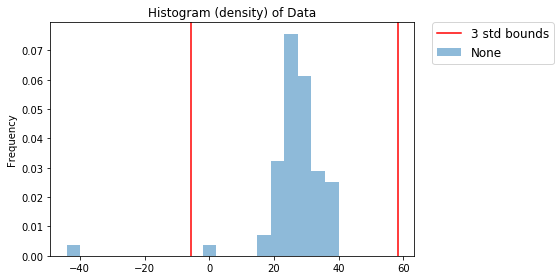

In [3]:
speed_mean = light_speed.mean()
speed_std = light_speed.std()
print('mean of light speed: ', speed_mean)
print('std of light speed: ', speed_std)

left_3_std = speed_mean - 3*speed_std
right_3_std = speed_mean + 3*speed_std

# 4.1 histogram
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
pd.Series(light_speed).plot(kind='hist', bins=20, density=True, alpha=0.5, ax=ax, title='Histogram (density) of Data')
ax.axvline(left_3_std, c='r')
ax.axvline(right_3_std, c='r', label='3 std bounds')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

In [4]:
print('Outliers - outside 3 std away:')
print(light_speed[light_speed<left_3_std])

Outliers - outside 3 std away:
[-44]


In [5]:
mu_mle = light_speed.mean()
var_mle = np.mean(np.square(light_speed - mu_mle))
print('MLE: mu = {}, sigma = {}'.format(mu_mle, np.sqrt(var_mle)))

MLE: mu = 26.21212121212121, sigma = 10.663610099255504


### Answer - 4.1
There are outliers (3 standard deviation away from mean): -44

---
### Answer - 4.2
$$
\begin{align}
p(\mu) &= \frac{1}{60} \quad \mu \in [0, 60]\\
p(\sigma) &= \frac{1}{49.9} \quad \sigma \in [0.1, 50] \\ \\
p(\mu, \sigma \vert D) & \propto p(D \vert \mu, \sigma) \thinspace p(\mu, \sigma) \\
&=p(D \vert \mu, \sigma) \thinspace p(\mu) p(\sigma) \\
&= 
\left\{
    \begin{array}{ll}
      \bigg( \frac{1}{60}\bigg) \bigg(\frac{1}{49.9} \bigg) \quad \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \bigg[-\frac{(x_i - \mu) ^2}{2\sigma^2} \bigg], \mu \in [0, 60], \sigma \in [0.1, 50] \\
      0, \ otherwise 
    \end{array}
\right.
\end{align}
$$

So 
$$
p(\mu, \sigma \vert D) =\quad \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \bigg[-\frac{(x_i - \mu) ^2}{2\sigma^2} \bigg]
$$
after normalization, when $\mu \in [0, 60]$ and $\sigma \in [0.1, 50]$, otherwise 0.

---
### Answer - Code 4.3

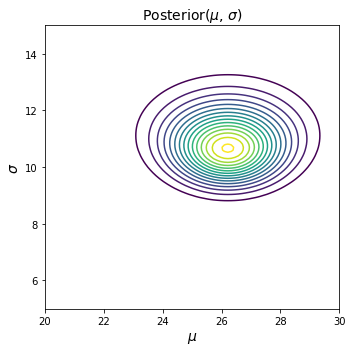

In [15]:
# 4.3
def get_posterior(mu, sigma, X):
    likelihood = 1.
    for xi in X:
        likelihood *= norm.pdf(xi, mu, sigma)
    prior_x_likelihood = (1/60)*(1/49.9)*likelihood
    posterior = prior_x_likelihood / np.sum(prior_x_likelihood)
    return posterior

mu_lin = np.linspace(0, 60, 500)
sigma_lin = np.linspace(0.1, 50, 500)
mu_grid, sigma_grid = np.meshgrid(mu_lin, sigma_lin)
posterior = get_posterior(mu_grid, sigma_grid, light_speed)

# Contour plot joint posterior(mu, sigma)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.contour(mu_grid, sigma_grid, posterior, levels=np.arange(posterior.min(),posterior.max(),1e-4))
ax.set_xlabel(r'$\mu$', fontsize=14)
ax.set_ylabel(r'$\sigma$', fontsize=14)
ax.set_xlim(20, 30)
ax.set_ylim(5, 15)
ax.set_title(r'Posterior($\mu$, $\sigma$)', fontsize=14)
plt.tight_layout()

### Answer - Code 4.4, 4.5

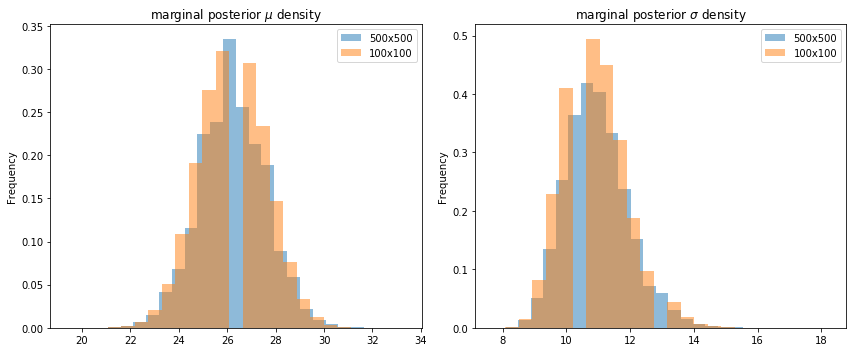

In [15]:
np.random.seed(1)

# --- 500 x 500 ---
sample_size = 500000
idx_samp = np.random.choice(500*500, sample_size, replace=True, p=posterior.reshape((500*500,)))
mu_grid_samp = mu_grid.reshape((500*500,))[idx_samp]
sigma_grid_samp = sigma_grid.reshape((500*500,))[idx_samp]

# --- 100 x 100 ---
mu_lin_100 = np.linspace(0, 60, 100)
sigma_lin_100 = np.linspace(0.1, 50, 100)
mu_grid_100, sigma_grid_100 = np.meshgrid(mu_lin_100, sigma_lin_100)
posterior_100 = get_posterior(mu_grid_100, sigma_grid_100, light_speed)

idx_samp_100 = np.random.choice(100*100, sample_size, replace=True, p=posterior_100.reshape((100*100,)))
mu_grid_samp_100 = mu_grid_100.reshape((100*100,))[idx_samp_100]
sigma_grid_samp_100 = sigma_grid_100.reshape((100*100,))[idx_samp_100]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

pd.Series(mu_grid_samp).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=axes[0], label='500x500',
                             title=r'marginal posterior $\mu$ density')
pd.Series(sigma_grid_samp).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=axes[1], label='500x500',
                                title=r'marginal posterior $\sigma$ density')

pd.Series(mu_grid_samp_100).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=axes[0], label='100x100')
pd.Series(sigma_grid_samp_100).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=axes[1], label='100x100')

axes[0].legend()
axes[1].legend()
plt.tight_layout()

### Answer 4.5
**How do the marginal posteriors now look? What does this look tell us about the dimensional scaling of this grid-sampling-in-proportion-to-posterior method of obtaining samples?**

A sample size of 500000 on the 500x500 grid can cover the full support of the posterior $\mu$ and $\sigma$, but not the case on the 100x100 grid. This tells us that the sample grid resolution should be proportionally compatible with the sample size - the more samples we need, the higher grid resolution is required.

---
### Answer - Code 4.6

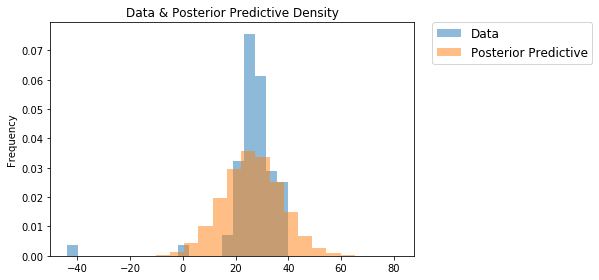

In [16]:
np.random.seed(1)

# 4.6
# draw posterior predictive samples
pp_grid = np.random.normal(loc=mu_grid_samp, scale=sigma_grid_samp)

# plot histogram - PP samples & data
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
pd.Series(light_speed).plot(kind='hist', bins=20, density=True, alpha=0.5, ax=ax, label='Data')
pd.Series(pp_grid.flatten()).plot(kind='hist', bins=20, density=True, alpha=0.5, ax=ax, label='Posterior Predictive')
ax.set_title('Data & Posterior Predictive Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

### Answer 4.6
**Plot the posterior predictive distribution against the data, and write down your observations.**

The posterior predictive is smoother than the raw data's empirical distribution, and the outlier (-44) was not within the spread of the posterior predictive.

---
### Answer - Code 4.7

In [17]:
mu_grid_samp.shape, sample_size, len(light_speed)

((500000,), 500000, 66)

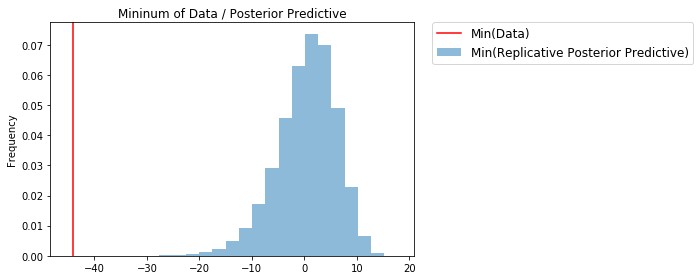

In [18]:
np.random.seed(1)

# 4.7
# iteratively draw posterior predictive samples & compute the minimum
rep_samp_size = sample_size # 500000
data_size = len(light_speed) # 66
rep_data = np.zeros((rep_samp_size, data_size))

# draw posterior predictive samples for 66 times
for _j in range(data_size):
    rep_data[:, _j] = np.random.normal(loc=mu_grid_samp, scale=sigma_grid_samp) 

# plot the minimum from replicative datasets coming from 66x posterior predictive samples
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
pd.Series(rep_data.min(axis=1)).plot(kind='hist', bins=25, density=True, alpha=0.5, ax=ax, 
                         label='Min(Replicative Posterior Predictive)')
ax.axvline(np.min(light_speed), label='Min(Data)', c='r')
ax.set_title('Mininum of Data / Posterior Predictive')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

### Answer 4.7
**Compute the replicative distribution of the minimum-value of the dataset and compare it to the actual value. What might you conclude about the quality of the specification of our model for the purposes of computing minimum values?**

Based on our plot above, the distribution of minimums from the replicative posterior predictive samples does not capture the minimum of the dataset. This could be due to either 1) The quality of the specification of our model is poor; or 2) The quality of the dataset is poor.

Given that we've shown the minimum of the dataset is likely an outlier (more than 3 standard deviations away), we argue that it's more likely that our model specification is appropriate but the quality of the dataset is poor. 